In [1]:
import numpy as np
from sklearn import cluster
from osgeo import gdal, gdal_array 
import os

In [3]:
img_ds = gdal.Open('D:/work/kmeans/images/2024_01_30_cutted.tif')

In [4]:
num_rasters = img_ds.RasterCount
    
img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, num_rasters),
                   gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

for b in range(num_rasters):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    

In [5]:
img

array([[[2185., 2432., 3275.],
        [2390., 2587., 3365.],
        [2301., 2431., 3204.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[2223., 2486., 3260.],
        [2323., 2512., 3253.],
        [2271., 2403., 3214.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[2174., 2409., 3185.],
        [2185., 2441., 3198.],
        [2146., 2399., 3194.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       ...,

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ...,
        [2372., 2510., 3227.],
        [2313., 2478., 3193.],
        [2217., 2424., 3225.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ...,
        [2129., 2389., 3205.],
        [2271., 2502., 3272.],
        [2220.,

In [6]:
img.shape

(424, 438, 3)

In [7]:
img_2 = img_ds.ReadAsArray()

In [8]:
img_2

array([[[2185., 2390., 2301., ...,    0.,    0.,    0.],
        [2223., 2323., 2271., ...,    0.,    0.,    0.],
        [2174., 2185., 2146., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ..., 2372., 2313., 2217.],
        [   0.,    0.,    0., ..., 2129., 2271., 2220.],
        [   0.,    0.,    0., ..., 2092., 2335., 2376.]],

       [[2432., 2587., 2431., ...,    0.,    0.,    0.],
        [2486., 2512., 2403., ...,    0.,    0.,    0.],
        [2409., 2441., 2399., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ..., 2510., 2478., 2424.],
        [   0.,    0.,    0., ..., 2389., 2502., 2511.],
        [   0.,    0.,    0., ..., 2409., 2514., 2542.]],

       [[3275., 3365., 3204., ...,    0.,    0.,    0.],
        [3260., 3253., 3214., ...,    0.,    0.,    0.],
        [3185., 3198., 3194., ...,    0.,    0.,    0.],
        ...,
        [   0.,    0.,    0., ..., 3227., 3193., 3225.],
        [   0.,    0.,    0., ..., 3205., 327

In [9]:
img_2.shape

(3, 424, 438)

In [11]:
np.moveaxis(img_2, 0, -1)

array([[[2185., 2432., 3275.],
        [2390., 2587., 3365.],
        [2301., 2431., 3204.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[2223., 2486., 3260.],
        [2323., 2512., 3253.],
        [2271., 2403., 3214.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       [[2174., 2409., 3185.],
        [2185., 2441., 3198.],
        [2146., 2399., 3194.],
        ...,
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.]],

       ...,

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ...,
        [2372., 2510., 3227.],
        [2313., 2478., 3193.],
        [2217., 2424., 3225.]],

       [[   0.,    0.,    0.],
        [   0.,    0.,    0.],
        [   0.,    0.,    0.],
        ...,
        [2129., 2389., 3205.],
        [2271., 2502., 3272.],
        [2220.,

In [12]:
img_ds.RasterXSize

438

In [2]:
a = gdal.Open("D:\work\kmeans\images\S2A_MSIL1C_20240130T091221_N0510_R050_T36VXN_20240130T093011.SAFE")

In [4]:
type(a)

NoneType

In [5]:
a == None

True

In [70]:
import numpy as np
from sklearn.cluster import KMeans
from osgeo import gdal, gdal_array 
import matplotlib.pyplot as plt
import os

def kmeans(input_path: str, output_path: str, num_clusters: int=2, init: str="k-means++", max_iter: int=300, algorithm: str="lloyd") -> int:
    """
    Performs k-means clustering of any gdal-compatible raster
    
    Parametrs
    ---------
    input_path: str
        path to source gdal-compatible raster

    num_clusters: int
        number of clusters to be created

    output_path: str
        path to create new raster in


    Returns
    --------
    int 
        0 if finished correct
        1 if invalid data source
        2 if error in clustering
        3 if error in file creation
        4 if invalid parameters
    Description 
    -----------
    based on https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    """
    if not init in ["k-means++", "random"]:
        return 4
    if not algorithm in ["lloyd", "elkan"]:
        return 4
    if not isinstance(num_clusters, int):
        return 4
    if not isinstance(max_iter, int):
        return 4
    gdal.UseExceptions()
    gdal.AllRegister()
    img_ds = gdal.Open(input_path, gdal.GA_ReadOnly)

    if (img_ds==None):
        return 1 
    
    num_rasters = img_ds.RasterCount

    img = img_ds.ReadAsArray()
    print(img.shape)
    img = np.moveaxis(img, 0, -1)
    print(img.shape)
    
    X = img.reshape((-1, num_rasters))

    
    try:
        model = KMeans(n_clusters=num_clusters)
        X_cluster = model.fit_predict(X)
        X_cluster = X_cluster.reshape(img.shape[:2])
    except Exception as e:
        print(e)
        return 2
    
    format = "GTiff"
    driver = gdal.GetDriverByName(format)

    try:
        if num_rasters == 1:
            X_cluster = np.moveaxis(X_cluster, 0, 1)
        out_data_raster = driver.Create(output_path, img_ds.RasterXSize, img_ds.RasterYSize, 1, gdal.GDT_Byte)
        out_data_raster.SetGeoTransform(img_ds.GetGeoTransform())
        out_data_raster.SetProjection(img_ds.GetProjection())
        
        out_data_raster.GetRasterBand(1).WriteArray(X_cluster)
        out_data_raster.FlushCache() 
        del out_data_raster
    except Exception as e:
        print(e)
        return 3

    return 0



(4, 306, 391)
(306, 391, 4)


C:\Users\AK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


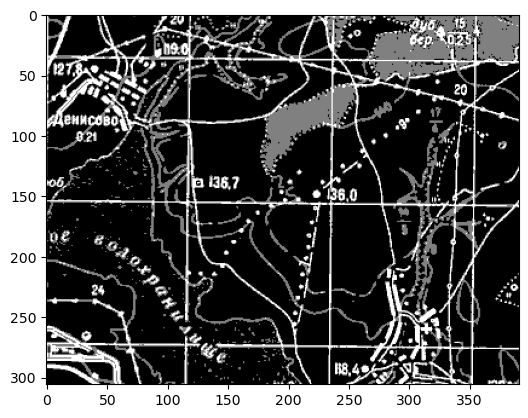

(306, 391)
(306, 391)
391 306
CPU times: total: 4.09 s
Wall time: 426 ms


In [76]:
%%time
band_1_image = "D:/work/imagery_clustering/data/1_band.tif"
band_1_image_output = "D:/work/kmeans/result_images/1_band_result.tif"
band_3_image = "D:/work/imagery_clustering/data/3_band.tif"
band_3_image_output = "D:/work/kmeans/result_images/3_band_result.tif"
rgba_image = "D:/work/imagery_clustering/data/rgba.tiff"
rgba_image_output = "D:/work/kmeans/result_images/rgba_result.tif"
topomap_image = "D:/work/imagery_clustering/data/topomap.png"
rgba_image_output = "D:/work/kmeans/result_images/topomap_result.tif"


output_img = kmeans("D:/work/imagery_clustering/data/topomap.png", "D:/work/kmeans/result_images/topomap_result.tif", 3)

In [65]:
output_img

2